# WITH PANDAS AND MATPLOTLIB

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [16]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [59]:
kill = pd.read_csv('PoliceKillingsUS.csv')
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [63]:
kill.gender

0       M
1       M
2       M
3       M
4       M
       ..
2530    M
2531    M
2532    M
2533    M
2534    M
Name: gender, Length: 2535, dtype: object

In [94]:
num = kill.gender.value_counts()
num

M    2428
F     107
Name: gender, dtype: int64

In [95]:
gend = kill.gender.unique()
gend

array(['M', 'F'], dtype=object)

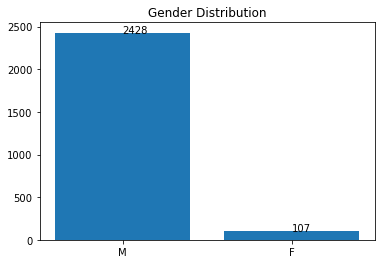

In [97]:

plt.bar(gend, num)
plt.title("Gender Distribution")

plt.text(x = 0, y=num[0], s = num[0])
plt.text(x = 1, y=num[1], s = num[1])

plt.show()

## 2: Plot 7 most common kill weapons

In [122]:
common_weapons= kill[kill.armed.isin(kill.armed.value_counts().index[0:7])]['armed'].value_counts()
common_weapons



gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [128]:
type_weapons = kill.armed.value_counts().index[0:7]
type_weapons

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

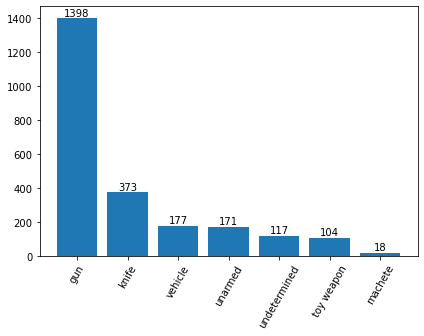

In [150]:
# with matplotlib

plt.bar(type_weapons, common_weapons)
plt.tight_layout()

for i in range(len(common_weapons)):
    plt.text(x=i, y=common_weapons[i]+15, s=common_weapons[i], ha='center')


plt.xticks(rotation=60)
plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [151]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [280]:
kill['limited_age']=kill['age']

kill['limited_age'].replace(to_replace=kill.limited_age[kill['limited_age'] <= 25].values, value='below25', inplace= True)


TypeError: '<=' not supported between instances of 'str' and 'int'

In [195]:
kill['limited_age'].fillna('below25', inplace=True)

In [281]:
kill['limited_age'].replace(to_replace= kill[kill['limited_age']!='below25']['limited_age'].values, value='above25', inplace=True)

In [289]:
kill['limited_age'].fillna('below25', inplace=True)

In [290]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_category,limited_age
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,53.0,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,47.0,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,below25,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,32.0,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39.0,above25


In [291]:
a =kill.limited_age.value_counts()
a

above25    1737
below25     517
Name: limited_age, dtype: int64

In [292]:
b= kill.limited_age.value_counts().index
b

Index(['above25', 'below25'], dtype='object')

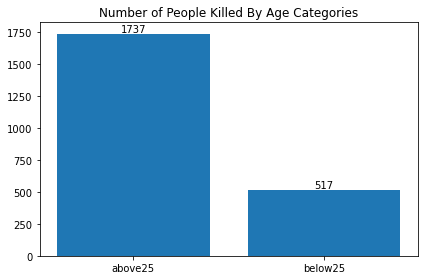

In [293]:
# with matplotlib

plt.bar(b, a)

#for i in range(len(a))
    #plt.text(x= i, y= a[i] +15, s=a[i], ha='center')
    
r=[0,1]
for i in range(len(bars)):
        plt.text(x=r[i], y=a[i]+10, s=a[i], ha='center', size=10)

plt.title('Number of People Killed By Age Categories')
plt.tight_layout()
plt.show()


## 4: Plot number of killed poeple by race

In [214]:
r = kill.race.value_counts()
r

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [216]:
p= kill.race.value_counts().index
p

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [212]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_category,limited_age
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,53.0,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,47.0,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,below25,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,32.0,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39.0,above25


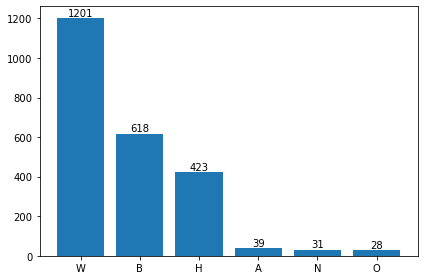

In [234]:
# with matplotlib

plt.bar(p,r)

t = np.arange(0,6) 
for i in range(len(r)):
    plt.text(x=t[i], y=r[i]+10, s= r[i], ha='center')
    
plt.tight_layout()
plt.show()
    

## 5: Killed People According to Races (Pie Chart)

In [235]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_category,limited_age
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,53.0,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,47.0,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,below25,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,32.0,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,39.0,above25


In [252]:
h= np.array(kill.race.value_counts().index)
h

array(['W', 'B', 'H', 'A', 'N', 'O'], dtype=object)

In [245]:
kill.race.value_counts()     #could not get the NaN value count

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [246]:
kill.dropna(inplace=True)

In [247]:
kill.shape

(2254, 16)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [250]:
a = kill.race.value_counts()
a

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [253]:
b= kill.race.value_counts().index
b

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [254]:
np.array(a)

array([1168,  592,  401,   36,   29,   28], dtype=int64)

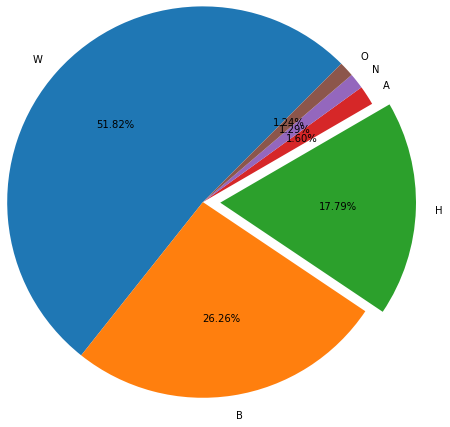

In [272]:
# matplotlib

plt.pie(a,labels=b, startangle=45, radius= 2.25, explode=exp, autopct='%0.2f%%')
exp= [0,0,0.2,0,0,0]

plt.show()
